# Tweeter Sentiment Analysis

### Practice Problem: Identify the Sentiments

Sentiment analysis is contextual mining of text which identifies and extracts subjective information in source material, and helping a business to understand the social sentiment of their brand, product or service while monitoring online conversations. Brands can use this data to measure the success of their products in an objective manner. In this challenge, you are provided with tweet data to predict sentiment on electronic products of netizens.

Sentiment analysis remains one of the key problems that has seen extensive application of natural language processing. This time around, given the tweets from customers about various tech firms who manufacture and sell mobiles, computers, laptops, etc, the task is to identify if the tweets have a negative sentiment towards such companies or products.

 

#### Evaluation Metric
The metric used for evaluating the performance of classification model would be weighted F1-Score.

 

#### Public and Private Split
Note that the test data is further randomly divided into Public (35%) and Private (65%) data. Your initial responses will be checked and scored on the Public data. The final rankings would be based on your private score which will be published once the competition is over.

#### Data
train.csv - For training the models, we provide a labelled dataset of 7920 tweets. The dataset is provided in the form of a csv file with each line storing a tweet id, its label and the tweet.

test.csv - The test data file contains only tweet ids and the tweet text with each tweet in a new line.

sample_submission.csv - The exact format for a valid submission

###### Most profane and vulgar terms in the tweets have been replaced with ###### “$&@*#.
However, please note that the dataset still might contain text that may be considered profane, vulgar, or offensive.

In [1]:
# to suppress warnings

from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
# import 'Pandas' to read the train and test csv file as Dataframe for futher analysis:

import pandas as pd
A=pd.read_csv("train_tweet.csv",header=None) #Training Dataset
B=pd.read_csv("test_tweet.csv",header=None) #Testing Dataset

# Reading first 3 data in training data=A
A.head(3)

,0,1,2
0,id,label,tweet
1,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
2,2,0,Finally a transparant silicon case ^^ Thanks t...


In [3]:
# Renaming the column header for better understanding

A.rename(columns = {0:'id',1:'label',2:'tweet'} , inplace = True)

In [4]:
#Dropping the row of index 0

A=A.drop(index=0)

In [5]:
#Displaying the dataframe A
A

,id,label,tweet
1,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
2,2,0,Finally a transparant silicon case ^^ Thanks t...
3,3,0,We love this! Would you go? #talk #makememorie...
4,4,0,I'm wired I know I'm George I was made that wa...
5,5,1,What amazing service! Apple won't even talk to...
...,...,...,...
7916,7916,0,Live out loud #lol #liveoutloud #selfie #smile...
7917,7917,0,We would like to wish you an amazing day! Make...
7918,7918,0,Helping my lovely 90 year old neighbor with he...
7919,7919,0,Finally got my #smart #pocket #wifi stay conne...


###### A is training dataset as 7920 rows with 3 columns

In [6]:
# Renaming the column header for better understanding

B.rename(columns = {0:'id',1:'tweet'} , inplace = True)

In [7]:
#Dropping the row of index 0

B=B.drop(index=0)

In [8]:
#Displaying the dataframe A

B

,id,tweet
1,7921,I hate the new #iphone upgrade. Won't let me d...
2,7922,currently shitting my fucking pants. #apple #i...
3,7923,"I'd like to puts some CD-ROMS on my iPad, is t..."
4,7924,My ipod is officially dead. I lost all my pict...
5,7925,Been fighting iTunes all night! I only want th...
...,...,...
1949,9869,"#SamsungGalaxyNote7 Explodes, Burns 6-Year-Old..."
1950,9870,Now Available - Hoodie. Check it out here - ht...
1951,9871,There goes a crack right across the screen. If...
1952,9872,@codeofinterest as i said #Adobe big time we m...


###### B is training dataset as 1953 rows with 2 columns

In [9]:
A.shape

(7920, 3)

In [10]:
B.shape

(1953, 2)

In [12]:
A.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7920 entries, 1 to 7920
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      7920 non-null   object
 1   label   7920 non-null   object
 2   tweet   7920 non-null   object
dtypes: object(3)
memory usage: 185.8+ KB


###### Checking missing Data present in the Training DataSet

In [13]:
A.nunique() #ID is an Unique Column

id       7920
label       2
tweet    7918
dtype: int64

In [14]:
B.nunique() #ID is an Unique Column

id       1953
tweet    1953
dtype: int64

In [15]:
# Dropping rows with null values
A.dropna()

,id,label,tweet
1,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
2,2,0,Finally a transparant silicon case ^^ Thanks t...
3,3,0,We love this! Would you go? #talk #makememorie...
4,4,0,I'm wired I know I'm George I was made that wa...
5,5,1,What amazing service! Apple won't even talk to...
...,...,...,...
7916,7916,0,Live out loud #lol #liveoutloud #selfie #smile...
7917,7917,0,We would like to wish you an amazing day! Make...
7918,7918,0,Helping my lovely 90 year old neighbor with he...
7919,7919,0,Finally got my #smart #pocket #wifi stay conne...


In [16]:
A.isna().sum() # No Null data is in training set

id       0
label    0
tweet    0
dtype: int64

In [17]:
B.isna().sum() # No null data is in Test 

id       0
tweet    0
dtype: int64

###### Converting string into lower case characters

In [18]:
A['tweet'] = A['tweet'].apply(lambda x : str(x).lower())

In [19]:
B['tweet'] = B['tweet'].apply(lambda x : str(x).lower())

In [20]:
 # import regular expression

import re

###### Removing special characters (Numbers , Punctuations , Characters)


In [21]:
A['tweet'] = A['tweet'].apply(lambda x : re.sub('[^a-z]+',' ',x))

In [22]:
B['tweet'] = B['tweet'].apply(lambda x : re.sub('[^a-z]+',' ',x))

In [23]:
 #import nltk

import nltk
from nltk.corpus import stopwords
nltk.download('wordnet')

[nltk_data] Error loading wordnet: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [24]:
 # import wordlcoud, stopwords
    
from wordcloud import WordCloud,STOPWORDS

In [25]:
stop_words = list(set(list(STOPWORDS)+ list(stopwords.words('english')))) ## Getting list of stopwords

In [26]:
len(stop_words) 

227

###### Removing all the stopwords

In [27]:
A['tweet'] = A['tweet'].apply(lambda x: ' '.join([i for i in x.split()]))

In [28]:
B['tweet'] = B['tweet'].apply(lambda x: ' '.join([i for i in x.split()]))

In [29]:
# import subpackage of Matplotlib

import matplotlib.pyplot as plt

##### Creating Word Cloud from training data set

In [30]:
wordsA = ' '.join(text for text in A['tweet'])

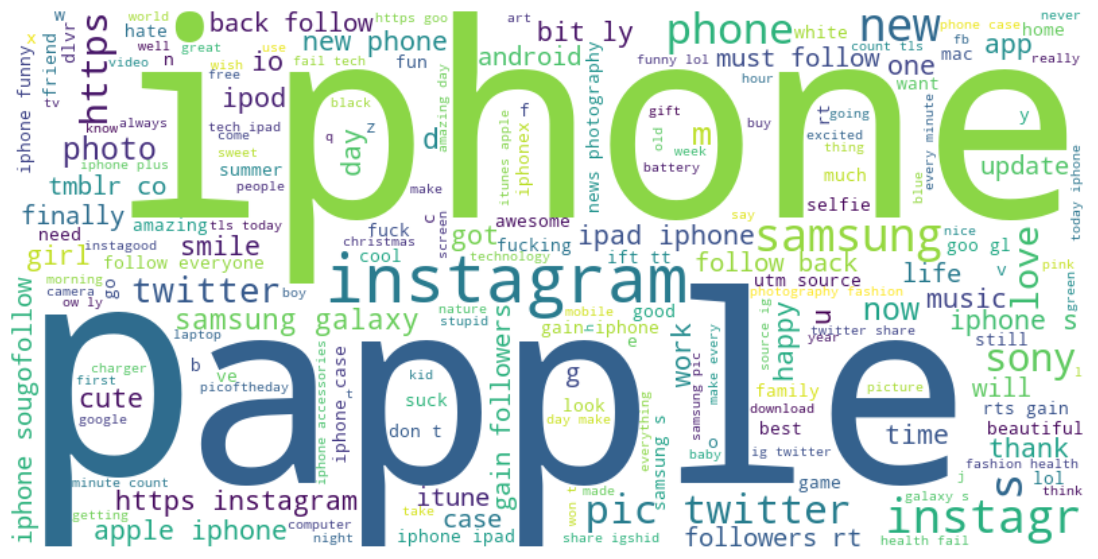

In [31]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(wordsA)
# Display the word cloud using matplotlib
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

##### Creating Word Cloud from testing data set

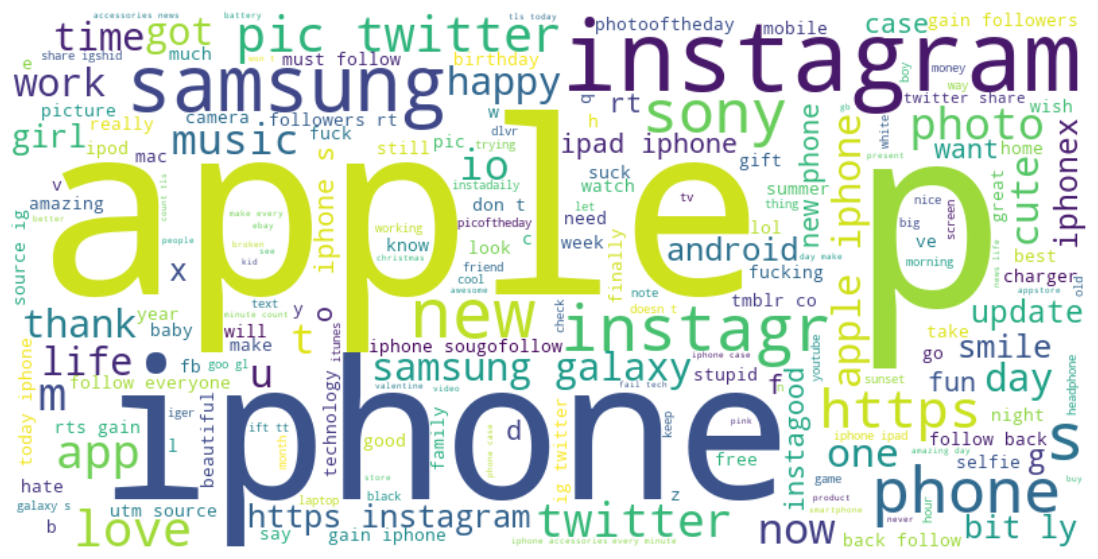

In [32]:
wordsB = ' '.join(text for text in B['tweet'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(wordsB)
# Display the word cloud using matplotlib
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [33]:
### Total number of words in train:A

total_wordA = pd.Series(wordsA.split()).value_counts()
total_wordA

iphone       4323
http         3442
com          3389
apple        3004
p            2784
             ... 
girded          1
worded          1
herded          1
spurted         1
wbapvzpcl       1
Length: 22681, dtype: int64

In [34]:
### Total number of words in train:A

total_wordB = pd.Series(wordsB.split()).value_counts()
total_wordB

iphone          1009
http             849
com              819
apple            772
p                701
                ... 
intensemedia       1
officialfm         1
ozazzio            1
fabiodesu          1
noxkipe            1
Length: 8380, dtype: int64

In [35]:
frequent_wordsA = list(total_wordA[0:10000].index)
len(frequent_wordsA)

10000

In [36]:
frequent_wordsB = list(total_wordB[0:10000].index)
len(frequent_wordsB)

8380

###### Replacing 0's for positive,neutral and irrelavent tweets / 1 for negative tweets in training set for label column(Target column)

In [42]:
from textblob import TextBlob

In [43]:
polarity = []

for comment in A['tweet']:
    try:
        polarity.append(TextBlob(comment).sentiment.polarity)
    except:
        polarity.append(0)

In [44]:
A['polarity']  = polarity

In [45]:
A.head(10)

,id,label,tweet,polarity
1,1,0,fingerprint pregnancy test https goo gl h mfqv...,0.675000
2,2,0,finally a transparant silicon case thanks to m...,0.100000
3,3,0,we love this would you go talk makememories un...,0.500000
4,4,0,i m wired i know i m george i was made that wa...,0.500000
5,5,1,what amazing service apple won t even talk to ...,-0.100000
6,6,1,iphone software update fucked up my phone big ...,-0.466667
7,7,0,happy for us instapic instadaily us sony xperi...,0.800000
8,8,0,new type c charger cable uk http www ebay co u...,0.074545
9,9,0,bout to go shopping again listening to music i...,0.000000
10,10,0,photo fun selfie pool water sony camera picoft...,0.400000


In [37]:
# Encoding Target variable
    
A['label'].replace({'Positive':0 , 'Neutral':0 ,'Irrelevant':0, 'Negative':1})

1       0
2       0
3       0
4       0
5       1
       ..
7916    0
7917    0
7918    0
7919    0
7920    0
Name: label, Length: 7920, dtype: object

## Define X and Y

In [38]:
X=A['tweet']  
Y=A[["label"]] # Assign Label to Output Variable

In [39]:
X.info # X Contains only the tweet column

<bound method Series.info of 1       fingerprint pregnancy test https goo gl h mfqv...
2       finally a transparant silicon case thanks to m...
3       we love this would you go talk makememories un...
4       i m wired i know i m george i was made that wa...
5       what amazing service apple won t even talk to ...
                              ...                        
7916    live out loud lol liveoutloud selfie smile son...
7917    we would like to wish you an amazing day make ...
7918    helping my lovely year old neighbor with her i...
7919    finally got my smart pocket wifi stay connecte...
7920    apple barcelona apple store bcn barcelona trav...
Name: tweet, Length: 7920, dtype: object>

### Spliting and train and test data

In [40]:
# import train-test split

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,random_state=101,test_size=0.2)# spliting randomly in size of test=20%,train=80%

In [41]:
len(xtrain) # Now my Xtrain holds 6336 out of 7920

6336

#### Transforming my text data using Tfidvectorizer and to fit in train model

In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [43]:
# Using TF-IDF vectorizer

vectorizer = TfidfVectorizer()
vectorizer.fit_transform(xtrain)

<6336x19325 sparse matrix of type '<class 'numpy.float64'>'
	with 110450 stored elements in Compressed Sparse Row format>

In [44]:
#transforming Xtrain and Xtest

tf_train = vectorizer.transform(xtrain) 
tf_test = vectorizer.transform(xtest)

In [45]:
# Creating a dataframe for both train and test dataset

train_df = pd.DataFrame(tf_train.toarray(),columns = vectorizer.get_feature_names())
test_df = pd.DataFrame(tf_test.toarray() , columns =vectorizer.get_feature_names())

In [46]:
 # import various functions from sklearn

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [47]:
# Creating a user defined function to store values of accuracy , precision , recall 

performance_df = pd.DataFrame(columns =['Model Name','Train Accuracy','Train Precision','Train Recall',
                                            'Train f1_score','Test Accuracy','Test Precision','Test Recall','Test f1_score'])  

# Creating Function for using different models

def model_performance(model,name,xtrain = xtrain, xtest =xtest):
    
    global performance_df 

    # Predicting train and test data
    
    pred_train=model.predict(xtrain)
    pred_test=model.predict(xtest) 
    
    # Calculating metrics for train and test data
    
    train_acc = round(accuracy_score(ytrain,pred_train),2)*100
    test_acc = round(accuracy_score(ytest,pred_test),2)*100
    train_precision = round(precision_score(ytrain,pred_train, average = 'macro'),2)
    test_precision = round(precision_score(ytest,pred_test, average = 'macro'),2)
    train_recall = round(recall_score(ytrain,pred_train, average = 'macro'),2)
    test_recall = round(recall_score(ytest,pred_test, average = 'macro'),2)
    train_f1 = round(f1_score(ytrain,pred_train, average = 'macro'),2)
    test_f1 = round(f1_score(ytest,pred_test, average = 'macro'),2)
    
    performance_df = performance_df.append({'Model Name':name,'Train Accuracy':train_acc,'Train Precision':train_precision,
                                        'Train Recall':train_recall,'Train f1_score':train_f1,
                                        'Test Accuracy':test_acc,'Test Precision':test_precision,'Test Recall':test_recall,
                                        'Test f1_score':test_f1},ignore_index=True)
    
    print('Train_Report \n',classification_report(ytrain,pred_train),'\n')
    print('Test_Report \n',classification_report(ytest,pred_test))

### Model 1:Logisic Regression

In [48]:
# Building Model using Logistic Regression

from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression(multi_class='multinomial').fit(train_df,ytrain)
model_performance(model_lr, name ='LogisticRegression',xtrain = train_df , xtest= test_df)

Train_Report 
               precision    recall  f1-score   support

           0       0.97      0.97      0.97      4737
           1       0.90      0.91      0.90      1599

    accuracy                           0.95      6336
   macro avg       0.93      0.94      0.94      6336
weighted avg       0.95      0.95      0.95      6336
 

Test_Report 
               precision    recall  f1-score   support

           0       0.91      0.92      0.92      1157
           1       0.78      0.77      0.77       427

    accuracy                           0.88      1584
   macro avg       0.85      0.84      0.85      1584
weighted avg       0.88      0.88      0.88      1584



### Model 2:Decision Tree Classifier

In [49]:
from sklearn.tree import DecisionTreeClassifier

# Building Model using DecisionTree
model_dt = DecisionTreeClassifier(max_depth=750,criterion='gini').fit(train_df,ytrain)
 
model_performance(model_dt, name = 'DecisionTree' , xtrain = train_df , xtest = test_df)

Train_Report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4737
           1       1.00      1.00      1.00      1599

    accuracy                           1.00      6336
   macro avg       1.00      1.00      1.00      6336
weighted avg       1.00      1.00      1.00      6336
 

Test_Report 
               precision    recall  f1-score   support

           0       0.88      0.87      0.88      1157
           1       0.66      0.69      0.68       427

    accuracy                           0.82      1584
   macro avg       0.77      0.78      0.78      1584
weighted avg       0.82      0.82      0.82      1584



### Model 3:Random Forest Classifier

In [50]:
# Building Model using RandomForest
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(max_depth=750,n_estimators = 150).fit(train_df,ytrain)                                       
model_performance(model_rf , name = 'Random Forest' , xtrain = train_df , xtest = test_df)

Train_Report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4737
           1       1.00      1.00      1.00      1599

    accuracy                           1.00      6336
   macro avg       1.00      1.00      1.00      6336
weighted avg       1.00      1.00      1.00      6336
 

Test_Report 
               precision    recall  f1-score   support

           0       0.92      0.90      0.91      1157
           1       0.75      0.78      0.76       427

    accuracy                           0.87      1584
   macro avg       0.83      0.84      0.84      1584
weighted avg       0.87      0.87      0.87      1584



### Model 4:Naive bayes

In [51]:
 # Building Model using Naive bayes
from sklearn.naive_bayes import MultinomialNB
model_nb = MultinomialNB().fit(train_df,ytrain)
model_performance(model_nb , name = 'Naive Bayes' , xtrain = train_df , xtest = test_df) ## function call

Train_Report 
               precision    recall  f1-score   support

           0       0.93      0.98      0.95      4737
           1       0.92      0.78      0.84      1599

    accuracy                           0.93      6336
   macro avg       0.93      0.88      0.90      6336
weighted avg       0.93      0.93      0.93      6336
 

Test_Report 
               precision    recall  f1-score   support

           0       0.85      0.96      0.90      1157
           1       0.84      0.56      0.67       427

    accuracy                           0.85      1584
   macro avg       0.85      0.76      0.79      1584
weighted avg       0.85      0.85      0.84      1584



###### Classification Report of all model for train and test

In [52]:
performance_df

,Model Name,Train Accuracy,Train Precision,Train Recall,Train f1_score,Test Accuracy,Test Precision,Test Recall,Test f1_score
0,LogisticRegression,95.0,0.93,0.94,0.94,88.0,0.85,0.84,0.85
1,DecisionTree,100.0,1.00,1.00,1.00,82.0,0.77,0.78,0.78
2,Random Forest,100.0,1.00,1.00,1.00,87.0,0.83,0.84,0.84
3,Naive Bayes,93.0,0.93,0.88,0.90,85.0,0.85,0.76,0.79


## Predict DataSet

#### B is the test dataset which going to predict Target column(Label) by Tweet

In [53]:
X_pred=B['tweet']  # Assign Label to Output Variable

In [54]:
len(X_pred) ## Exact test dataset is 1953 as given

1953

In [55]:
X_pred.info() ## Information

<class 'pandas.core.series.Series'>
RangeIndex: 1953 entries, 1 to 1953
Series name: tweet
Non-Null Count  Dtype 
--------------  ----- 
1953 non-null   object
dtypes: object(1)
memory usage: 15.4+ KB


##### Again Pre-processing the text in tweet using Vectorizer

In [56]:
# Using TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()
tfidf_vectors = tfidf_vectorizer.fit_transform(X_pred)

In [57]:
tfidf_vectors.shape

(1953, 8354)

In [58]:
X_pred_tf=vectorizer.transform(X_pred)

In [59]:
X_pred_tf # This is Transformed X_pred

<1953x19325 sparse matrix of type '<class 'numpy.float64'>'
	with 29620 stored elements in Compressed Sparse Row format>

### Create a dataframe for the target column and predicting 

#### Logistic Regresion Prediction

In [60]:
label=pd.DataFrame(model_lr.predict(X_pred_tf),columns=['label'])

#Finally joing the label with id in the test dataset

Submission1=B.join(label)[["id","label"]]

In [62]:
# Exporting the final output to .csv file

Submission1.to_csv("submission 1_tweeter_analysis_after_testing.csv")

## Conclusion:

1.Logistic Regression is best alogirithm to find accurate predictions comparing to other model.

2.Using Vectorizer with Logistic Regression model, we are able to achieve near about 85% accuracy.(Test_f1 score)